# **I.KHÁM PHÁ DỮ LIỆU** **văn bản in đậm**

**1.import thư viện**

In [864]:
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import  KFold, cross_val_score
from sklearn.ensemble import StackingRegressor



import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')


**2.Chuẩn bị dữ liệu cho một mô hình dự đoán**

In [865]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('../Data/Advertising Budget and Sales.csv', index_col=0, names=['TV', 'Radio', 'Newspaper', 'Sales'], skiprows=1)

# Hiển thị 5 dòng đầu tiên
print(df.head())

# Xác định nhãn và đặc trưng
target = 'Sales'
features = [col for col in df.columns if col != target]

# Sao chép dữ liệu
original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Inference: The Dataset consists of 4 features & 200 samples.


**3.Kiểm tra các kiểu dữ liệu của tất cả các cột**

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


*Bộ dữ liệu chiếm 7.8 KB bộ nhớ.*

**4.Kiểm tra số lượng giá trị duy nhất**

In [867]:
df.nunique().sort_values()

Sales        121
Radio        167
Newspaper    172
TV           190
dtype: int64

**5.Phân loại các cột trong bộ dữ liệu thành hai nhóm**

In [868]:
# Đếm số lượng giá trị duy nhất trong các cột đặc trưng, sau đó sắp xếp theo thứ tự tăng dần
nu = df[features].nunique().sort_values()

# Khởi tạo danh sách để lưu các đặc trưng số học (numerical features) và phân loại (categorical features)
nf = []  # Danh sách lưu các đặc trưng số học
cf = []  # Danh sách lưu các đặc trưng phân loại
nnf = 0
ncf = 0

# Duyệt qua tất cả các cột đặc trưng để phân loại thành số học hoặc phân loại
for i in range(df[features].shape[1]):
    # Nếu cột có ≤ 16 giá trị duy nhất, coi nó là đặc trưng phân loại (categorical)
    if nu.values[i] <= 16:
        cf.append(nu.index[i])
    # Nếu cột có > 16 giá trị duy nhất, coi nó là đặc trưng số học (numerical)
    else:
        nf.append(nu.index[i])

# In ra kết quả, hiển thị số lượng đặc trưng số học và phân loại
print('\n\033[1mKết luận:\033[0m Bộ dữ liệu có {} đặc trưng số học và {} đặc trưng phân loại.'.format(len(nf), len(cf)))



Kết luận: Bộ dữ liệu có 3 đặc trưng số học và 0 đặc trưng phân loại.


**6.Tổng hợp và hiển thị các thống kê mô tả**

In [869]:
display(df.describe())

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- Số lượng (count)
- Giá trị trung bình (mean) 
- Độ lệch chuẩn (std) Giá trị tối thiểu (min)  
- Phân vị (quartiles) 
    + 25% (Q1- phân vị thứ nhất) 
    + 50% (Q2) (trung vị) 
    + 75% (Q3 - phân vị thứ ba) Giá trị tối đa (max)

# **II. PHÂN TÍCH DỮ LIỆU KHÁM PHÁ**

**1.Biểu đồ phân phối của biến mục tiêu**

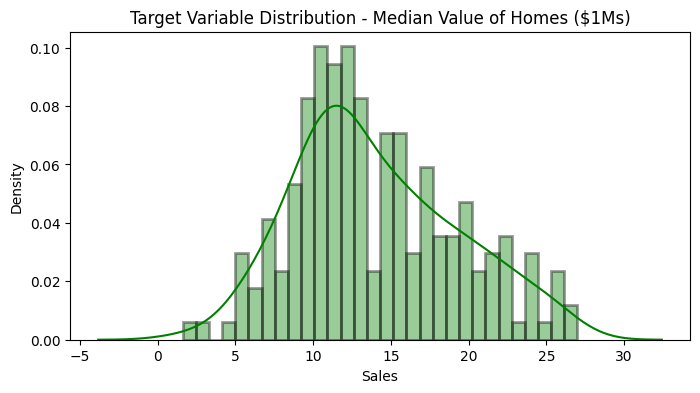

In [870]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Suy luận:** Biến mục tiêu có vẻ như được phân phối bình thường, trung bình khoảng $12(đơn vị)

**3.Trực quan hóa các đặc điểm số**

                                                   Phân Bố Các Đặc Điểm Số                                                    


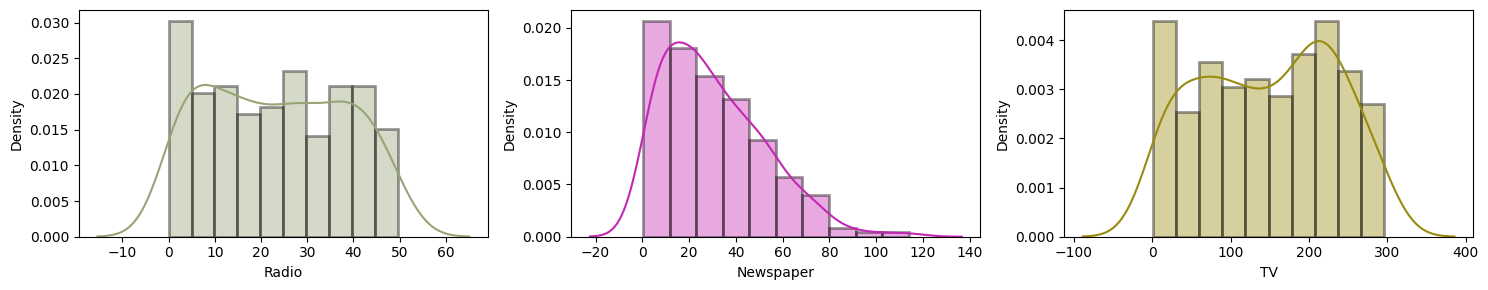

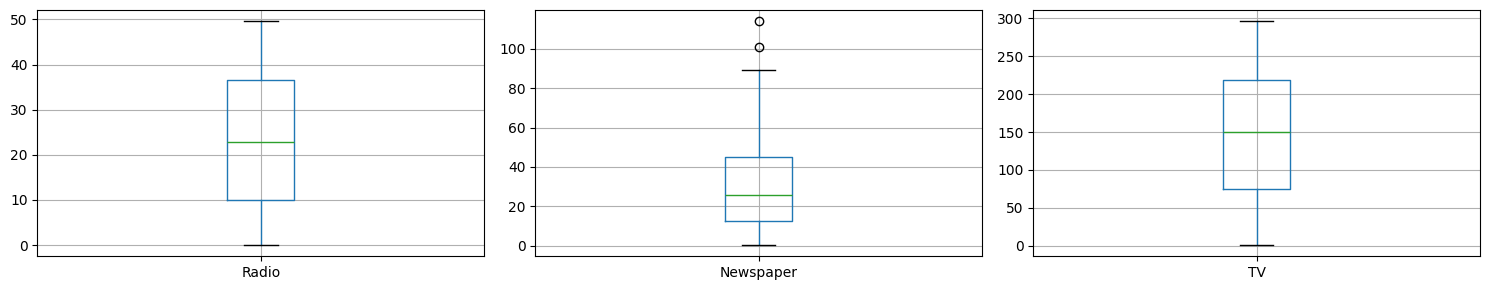

In [871]:
# Trực quan hóa phân bố các đặc điểm số
print('\033[1mPhân Bố Các Đặc Điểm Số'.center(130))

n = 3  # Số lượng cột để hiển thị trong mỗi hàng
plt.figure(figsize=[15, 3 * math.ceil(len(nf) / n)])  # Thiết lập kích thước hình

# Vẽ biểu đồ phân bố cho từng đặc điểm số
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf) / 3), n, i + 1)  # Tạo bố cục cho các biểu đồ
    sns.distplot(df[nf[i]], hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()  # Hiển thị các biểu đồ

# Trực quan hóa các giá trị bất thường (outliers) cho các đặc điểm số
plt.figure(figsize=[15, 3 * math.ceil(len(nf) / n)])  # Thiết lập kích thước hình
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf) / 3), n, i + 1)  # Tạo bố cục cho các boxplot
    df.boxplot(nf[i])  # Vẽ boxplot cho từng đặc điểm số

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các boxplot
plt.show()  # Hiển thị boxplots


*Kết luận: Có vẻ như có một số giá trị bất thường. Chúng ta sẽ xử lý chúng trong phần tiếp theo...*

**Biểu đồ boxplot (hay còn gọi là biểu đồ hộp)**
Là một công cụ trực quan hiệu quả để tóm tắt phân bố của một tập dữ liệu, bao gồm các thông tin như:
- Giá trị trung vị: Đường kẻ ngang bên trong hộp.
- Các tứ phân vị: Các cạnh của hộp biểu thị Q1 (tứ phân vị thứ nhất) và Q3 (tứ phân vị thứ ba). Khoảng cách giữa Q1 và Q3 được gọi là khoảng tứ phân vị 
(IQR).
     + Giới hạn trên của hộp (box) trong biểu đồ hộp (box plot) là phần tư thứ ba (Q3), còn giới hạn dưới của hộp là phần tư thứ nhất (Q1).
- Các giá trị ngoại lệ: Các điểm nằm ngoài các râu của hộp.
-  Râu trên và râu dưới: Các đường thẳng kéo dài từ hộp đến các giá trị cực đại và cực tiểu trong dữ liệu, nhưng không bao gồm các giá trị ngoại lai (outliers)

**Nhận xét**
Dựa trên các biểu đồ boxplot và cột, ta có thể rút ra kết luận ban đầu rằng:
- Ngân sách quảng cáo trên TV có sự biến động lớn nhất, với một số chiến dịch có ngân sách rất cao.
- Ngân sách quảng cáo trên Radio  sự phân bố tương đối đồng đều và ổn định hơn.
- Ngân sách của newspaper có nhiều chiến dịch ngân sách thấp 

# **III. TIỀN XỬ LÝ DỮ LIỆU/Thao tác dữ liệu**

**1.Xóa bất kỳ hàng nào trùng lặp**

In [872]:
# Xóa bất kỳ hàng nào trùng lặp (nếu có)
counter = 0
rs, cs = original_df.shape  # Lưu kích thước ban đầu của DataFrame

df.drop_duplicates(inplace=True)  # Xóa các hàng trùng lặp

# Kiểm tra xem kích thước của DataFrame có thay đổi hay không
if df.shape == (rs, cs):
    print('\n\033[1mInference:\033[0m Bộ dữ liệu không có bất kỳ bản sao nào')
else:
    print(f'\n\033[1mInference:\033[0m Số lượng bản sao đã loại bỏ/sửa chữa ---> {rs - df.shape[0]}')



Inference: Bộ dữ liệu không có bất kỳ bản sao nào


**2.Kiểm tra và thống kê các giá trị null**

In [873]:
# Kiểm tra các phần tử null
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Tổng số giá trị Null'])
nvc['Tỷ lệ phần trăm'] = round(nvc['Tổng số giá trị Null'] / df.shape[0], 3) * 100
print(nvc)


           Tổng số giá trị Null  Tỷ lệ phần trăm
TV                            0              0.0
Radio                         0              0.0
Newspaper                     0              0.0
Sales                         0              0.0


**Kết luận :**
- Dataset không có bất kì giá trị không nhất quán nào

**3.Chia tệp dữ liệu / loại bỏ các giá trị ngoại lai/ Chuẩn hóa dữ liệu**

In [874]:


# Đọc dữ liệu từ file CSV
file_path = r'../Data/Advertising Budget and Sales.csv'
df = pd.read_csv(file_path)

# Xóa cột số thứ tự
df = df.drop(columns=['Unnamed: 0'])

# Sao chép DataFrame để làm việc
df1 = df.copy()

# Thay đổi tên cột
df1.columns = [i.replace(' ', '_') for i in df1.columns]

# Định nghĩa biến mục tiêu
target = 'Sales_($)'

# Tách dữ liệu thành đặc trưng và mục tiêu
X = df1.drop(columns=[target])
Y = df1[target]

# Phân chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

# Loại bỏ các giá trị ngoại lai từ tập huấn luyện
features1 = Train_X.columns
outlier_indices = []

for i in features1:
    if Train_X[i].dtype in ['int64', 'float64']:
        Q1 = Train_X[i].quantile(0.25)
        Q3 = Train_X[i].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (Train_X[i] < (Q1 - 1.5 * IQR)) | (Train_X[i] > (Q3 + 1.5 * IQR))
        outlier_indices.extend(Train_X[outlier_condition].index.tolist())

# Chỉ loại bỏ các chỉ số ngoại lai duy nhất
outlier_indices = list(set(outlier_indices))
Train_X = Train_X.drop(index=outlier_indices)
Train_Y = Train_Y.drop(index=outlier_indices)

# Chuẩn hóa dữ liệu chỉ cho X
scaler_X = StandardScaler()
Train_X_std = scaler_X.fit_transform(Train_X)
Test_X_std = scaler_X.transform(Test_X)

# Không chuẩn hóa Y
Train_Y_std = Train_Y.values  # Giữ nguyên giá trị
Test_Y_std = Test_Y.values

# Lưu scaler vào tệp .pkl
joblib.dump(scaler_X, '../savefile/scaler_X.pkl')

# Phân chia tập huấn luyện thành tập huấn luyện và tập validation
Train_X_std, Validation_X_std, Train_Y_std, Validation_Y_std = train_test_split(Train_X_std, Train_Y_std, train_size=0.7, test_size=0.3, random_state=100)

# Tạo DataFrame cho các tập dữ liệu
Train_X_df = pd.DataFrame(Train_X_std, columns=Train_X.columns)
Train_Y_df = pd.DataFrame(Train_Y_std, columns=[target])
Validation_X_df = pd.DataFrame(Validation_X_std, columns=Train_X.columns)
Validation_Y_df = pd.DataFrame(Validation_Y_std, columns=[target])
Test_X_df = pd.DataFrame(Test_X_std, columns=Train_X.columns)
Test_Y_df = pd.DataFrame(Test_Y_std, columns=[target])

# Hiển thị kích thước của các tập dữ liệu
print('Kích thước của các tập dữ liệu:')
print('Tập dữ liệu gốc ---> ', df1.shape)
print('Tập huấn luyện ---> ', Train_X_df.shape, Train_Y_df.shape)
print('Tập xác thực ---> ', Validation_X_df.shape, Validation_Y_df.shape)
print('Tập kiểm tra ---> ', Test_X_df.shape, Test_Y_df.shape)

# Lưu các tập dữ liệu vào các file CSV
Train_X_df.to_csv('../savefile/Train_X.csv', index=False)
Train_Y_df.to_csv('../savefile/Train_Y.csv', index=False)
Validation_X_df.to_csv('../savefile/Val_X.csv', index=False)
Validation_Y_df.to_csv('../savefile/Val_Y.csv', index=False)
Test_X_df.to_csv('../savefile/Test_X.csv', index=False)
Test_Y_df.to_csv('../savefile/Test_Y.csv', index=False)

print("Các file dữ liệu đã được lưu thành công!")


Kích thước của các tập dữ liệu:
Tập dữ liệu gốc --->  (200, 4)
Tập huấn luyện --->  (110, 3) (110, 1)
Tập xác thực --->  (48, 3) (48, 1)
Tập kiểm tra --->  (40, 3) (40, 1)
Các file dữ liệu đã được lưu thành công!


**Nhận xét:**
Các tổng dữ liệu trên 3 tệp (Tệp huấn luyện , tệp xác thực , tệp kiểm tra) là 198 => Chúng ta đã loại bỏ dữ liệu ngoại lai thành công

# **IV.Lựa chọn/ Trích xuất tính năng**

                        Ma trận tương quan                        


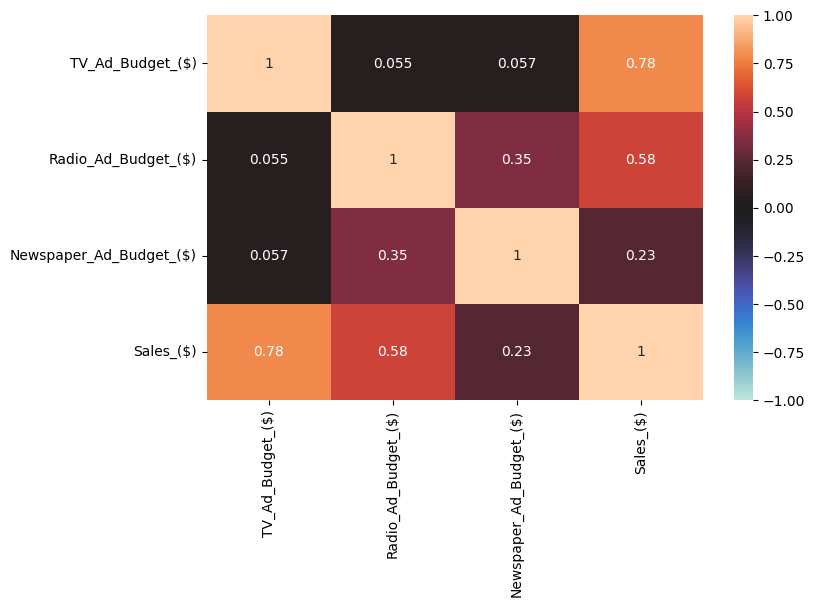

In [875]:
#Kiểm tra sự tương quan giữa các tính năng

print('\033[1mMa trận tương quan'.center(70))
plt.figure(figsize=[8,5])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()


**Nhận xét từ ma trận:**
- TV_Ad_Budget và Sales: Có mối tương quan dương mạnh (0.78). Điều này cho thấy khi tăng ngân sách quảng cáo trên truyền hình, doanh số có xu hướng tăng đáng kể. Đây là một mối quan hệ tích cực và đáng chú ý.
- Radio_Ad_Budget và Sales: Cũng có mối tương quan dương (0.58), nhưng không mạnh bằng TV. Điều này cho thấy quảng cáo trên đài phát thanh cũng có tác động tích cực đến doanh số, nhưng mức độ ảnh hưởng không lớn bằng truyền hình.
- Newspaper_Ad_Budget và Sales: Mối tương quan khá yếu (0.23). Điều này cho thấy việc tăng ngân sách quảng cáo trên báo chí không có tác động đáng kể đến doanh số.
- Các biến quảng cáo với nhau: Các biến ngân sách quảng cáo trên truyền hình, đài phát thanh và báo chí có mối tương quan dương yếu hoặc rất yếu. Điều này có thể cho thấy các kênh quảng cáo này không cạnh tranh trực tiếp nhau mà bổ sung cho nhau.

**Kết luận:**
- Truyền hình là kênh quảng cáo hiệu quả nhất: Dựa trên ma trận tương quan, việc đầu tư vào quảng cáo truyền hình mang lại hiệu quả cao nhất trong việc tăng doanh số.
- Đài phát thanh cũng đóng góp tích cực: Mặc dù không mạnh bằng truyền hình, nhưng quảng cáo trên đài phát thanh vẫn có thể hỗ trợ tăng doanh số.
- Báo chí ít hiệu quả: Quảng cáo trên báo chí dường như không phải là kênh quảng cáo hiệu quả cho sản phẩm này.


# **VI. Mô hình dự đoán**

**Viết hàm đánh giá (mọi người chỉ cần gọi ra và dùng)**

In [876]:

# Đọc dữ liệu đã được xử lý và tiêu chuẩn hóa
Train_X_std = pd.read_csv('../savefile/Train_X.csv')
Train_Y = pd.read_csv('../savefile/Train_Y.csv').values.ravel()
Val_X_std = pd.read_csv('../savefile/Val_X.csv')
Val_Y = pd.read_csv('../savefile/Val_Y.csv').values.ravel()
Test_X_std = pd.read_csv('../savefile/Test_X.csv')
Test_Y = pd.read_csv('../savefile/Test_Y.csv').values.ravel()

# Hàm đánh giá mô hình
def evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    # Dự đoán trên tập huấn luyện, tập xác thực và tập kiểm tra
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    # Tính toán các chỉ số đánh giá
    train_r2 = r2_score(Y_train, train_preds)
    val_r2 = r2_score(Y_val, val_preds)
    test_r2 = r2_score(Y_test, test_preds)
    train_mse = mean_squared_error(Y_train, train_preds)
    val_mse = mean_squared_error(Y_val, val_preds)
    test_mse = mean_squared_error(Y_test, test_preds)
    train_rmse = np.sqrt(train_mse)
    val_rmse = np.sqrt(val_mse)
    test_rmse = np.sqrt(test_mse)

    # Tạo bảng bằng định dạng chuỗi
    header = f"{'Dataset':<12}{'R2 Score':<12}{'MSE':<12}{'RMSE':<12}"
    train_row = f"{'Training':<12}{train_r2:<12.4f}{train_mse:<12.4f}{train_rmse:<12.4f}"
    val_row = f"{'Validation':<12}{val_r2:<12.4f}{val_mse:<12.4f}{val_rmse:<12.4f}"
    test_row = f"{'Testing':<12}{test_r2:<12.4f}{test_mse:<12.4f}{test_rmse:<12.4f}"

    # In bảng
    print(header)
    print('-' * len(header))
    print(train_row)
    print(val_row)
    print(test_row)
    return {
        'train_r2': train_r2,
        'val_r2': val_r2,
        'test_r2': test_r2,
        'train_mse': train_mse,
        'val_mse': val_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'test_rmse': test_rmse
    }




**# ĐỒ THỊ THỂ HIỆN SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN (mình dã viết hàm có sẵn mn chỉ cần gọi và dùng)**

In [877]:
def plot_predictions(model, X, Y, title, subplot_position):
    preds = model.predict(X)
    plt.subplot(1, 3, subplot_position)  # 1 hàng, 3 cột, vị trí của biểu đồ
    plt.scatter(Y, preds, color='blue', label='Predictions')
    plt.plot(Y, Y, color='red', label='True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(title)
    plt.legend()
    plt.grid(True)



    
def plot_predictions_three_sets(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    plt.figure(figsize=(18, 6))  # Tạo figure với kích thước phù hợp

    # Vẽ đồ thị cho tập train
    plot_predictions(model, X_train, Y_train, 'Train: Actual vs Prediction', 1)

    # Vẽ đồ thị cho tập validation
    plot_predictions(model, X_val, Y_val, 'Validation: Actual vs Prediction', 2)

    # Vẽ đồ thị cho tập test
    plot_predictions(model, X_test, Y_test, 'Test: Actual vs Prediction', 3)

    plt.tight_layout()
    plt.show()




**DƯỚI ĐÂY LÀ PHẦN TRIỂN KHAI CỦA MÔ HÌNH Linear Regression**

In [878]:

# 1. Linear Regression
print("Linear Regression:")
lin_reg = LinearRegression()
lin_reg.fit(Train_X_std, Train_Y)
evaluate_model(lin_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)
joblib.dump(lin_reg, r'../savefile/linear_regression_model.pkl')





Linear Regression:
Dataset     R2 Score    MSE         RMSE        
------------------------------------------------
Training    0.8912      3.0963      1.7596      
Validation  0.8809      3.2045      1.7901      
Testing     0.9230      1.6368      1.2794      


['../savefile/linear_regression_model.pkl']

**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN Linear regression**

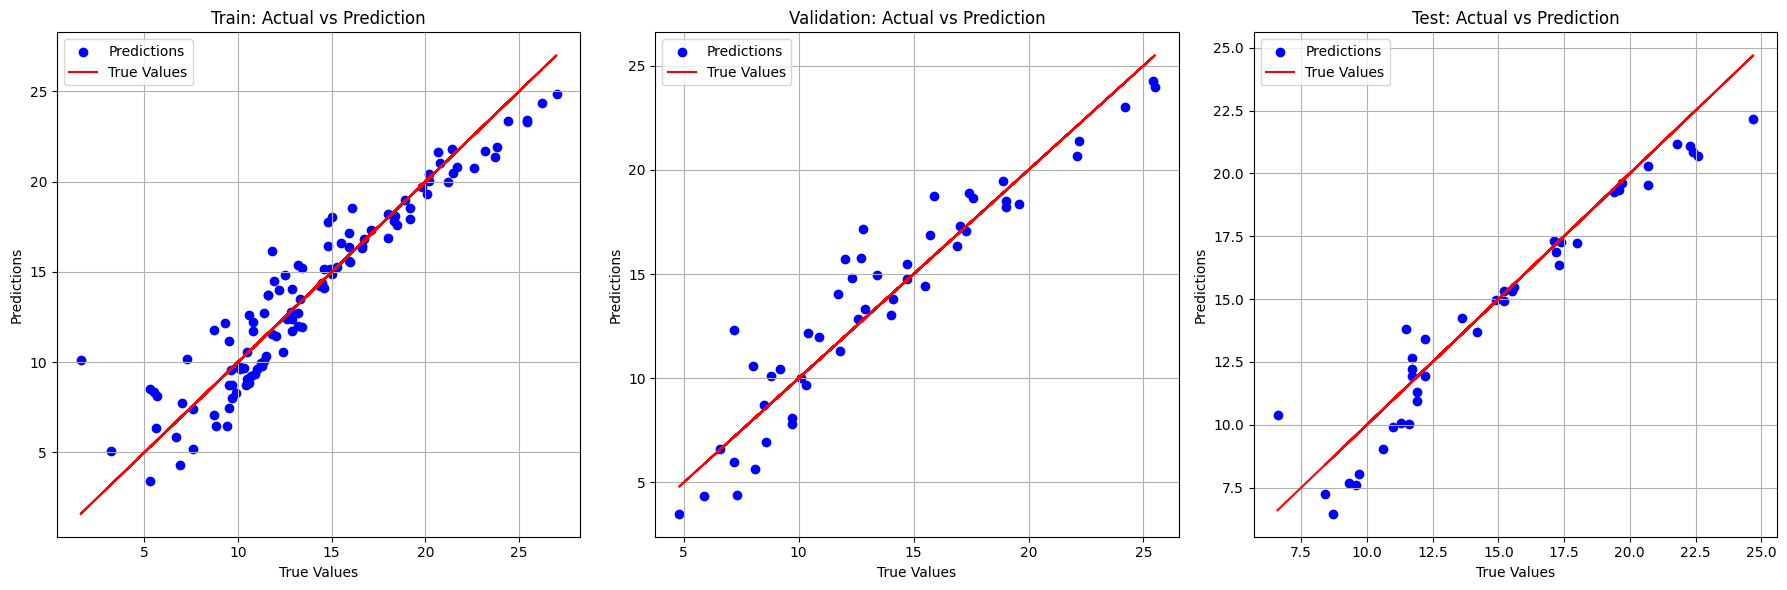

In [879]:

# Gọi hàm để vẽ
plot_predictions_three_sets(lin_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)

**DƯỚI ĐÂY LÀ PHÂN TRIỂN KHAI MÔ HÌNH Ridge Regression**

**Tìm anpha thích hợp và huấn luyện mô hình **

In [891]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
import numpy as np
import joblib

# 2. Hồi quy Ridge
print("\nHồi quy Ridge:")

# Khởi tạo mô hình Ridge Regression
ridge = Ridge()

# Định nghĩa khoảng giá trị alpha cho mô hình
alpha_range = np.logspace(0, 5, 100)

# Tạo lưới tham số cho RandomizedSearchCV
param_grid = {'alpha': alpha_range}

# Khởi tạo RandomizedSearchCV với các tham số đã định nghĩa
# n_iter là số lần tìm kiếm, scoring là tiêu chí đánh giá, cv là số lần phân tách dữ liệu (cross-validation)
random_search = RandomizedSearchCV(ridge, param_grid, n_iter=14, scoring='neg_mean_squared_error', cv=6, random_state=0)

# Huấn luyện mô hình với dữ liệu huấn luyện đã chuẩn hóa
random_search.fit(Train_X_std, Train_Y)
#Lấy mô hình và giá trị anpha tốt nhất
best_alpha = random_search.best_params_['alpha']
ridge_best = Ridge(alpha=best_alpha)

# Huấn luyện lại mô hình với dữ liệu huấn luyện đã chuẩn hóa
ridge_best.fit(Train_X_std, Train_Y)

# Đánh giá mô hình trên các tập dữ liệu
evaluate_model(ridge_best, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)

# Lưu mô hình hồi quy Ridge vào file
joblib.dump(ridge_best, '../savefile/ridge_regression_model.pkl')

# In ra giá trị alpha tốt nhất đã tìm được
print(f"Alpha tốt nhất: {best_alpha}")



Hồi quy Ridge:
Dataset     R2 Score    MSE         RMSE        
------------------------------------------------
Training    0.8911      3.0999      1.7607      
Validation  0.8824      3.1639      1.7787      
Testing     0.9221      1.6550      1.2865      
Alpha tốt nhất: 1.2618568830660204


**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN ridge**

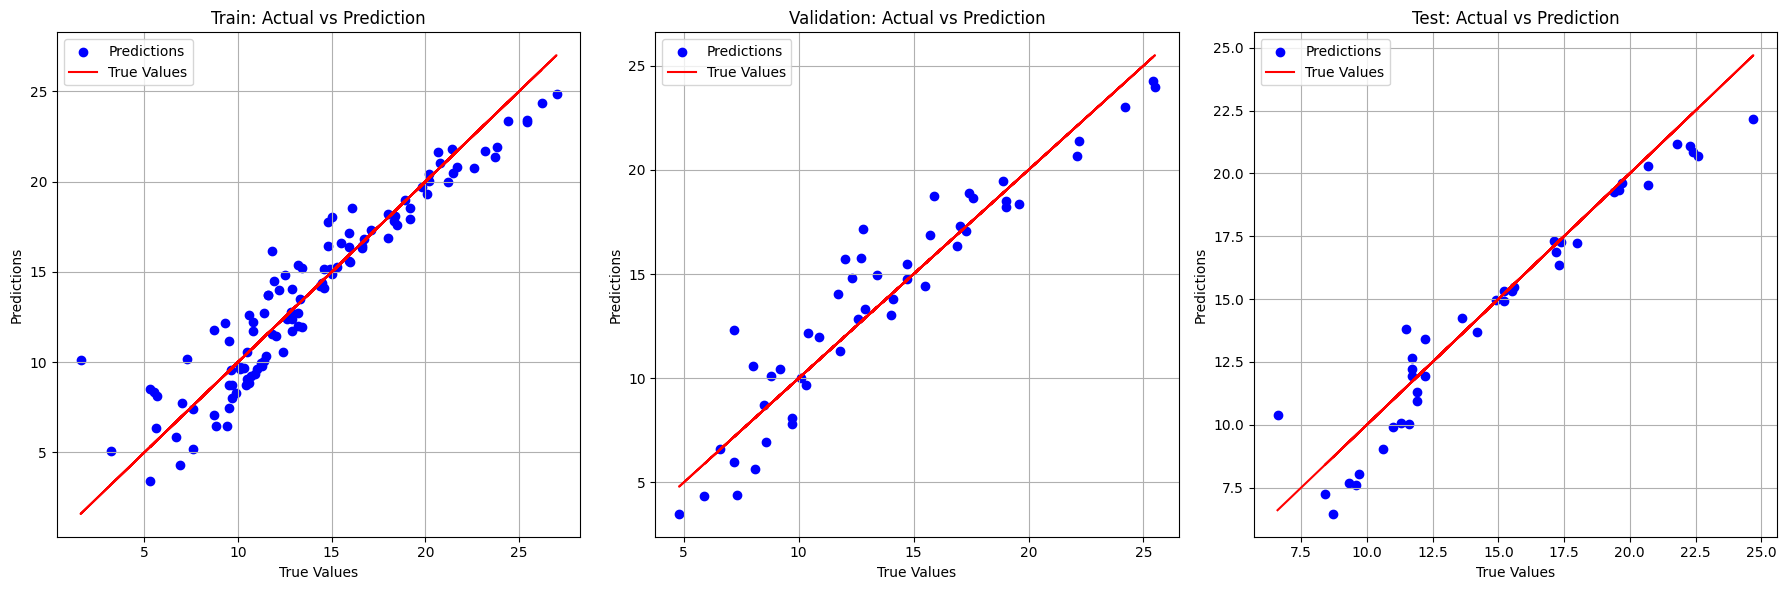

In [881]:
plot_predictions_three_sets(ridge_best, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)

**DƯỚI ĐÂY LÀ PHẦN TRIỂN KHAI CỦA MÔ HÌNH NEURAL NETWORK**

#Sử dụng GridSearchCV để tìm các siêu tham số tốt nhất trên 3 tệp và đánh giá kết luận sử dụng tham số nào

In [882]:

# 1 Định nghĩa lưới tham số cho GridSearch
param_grid = {
    'hidden_layer_sizes': [ (50,), (100,), (50, 50)],
    'activation': [    'relu',    'tanh'],
    'solver': [     'adam',   'sgd',   ],
    'max_iter': [     1000,     2000, ]
}

mlp = MLPRegressor(random_state=1)

# 2 Tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')


**Trên tập validation**

In [883]:

print("\nTrên tập validation")
grid_search.fit(Val_X_std , Val_Y )
# Hiển thị tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)


Trên tập validation
Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'max_iter': 2000, 'solver': 'adam'}


**Trên tệp Test**

In [884]:
print("\n Trên tập test")
grid_search.fit(Test_X_std, Test_Y)
print("Best parameters found: ", grid_search.best_params_)


 Trên tập test
Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'max_iter': 2000, 'solver': 'adam'}


**Trên tập train**

In [885]:
print("\n Trên tập train")
grid_search.fit(Train_X_std,Train_Y)
# Hiển thị tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)


 Trên tập train
Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'max_iter': 2000, 'solver': 'adam'}


In [886]:

# # Huấn luyện MLPRegressor
# mlp_reg = MLPRegressor(activation='relu',hidden_layer_sizes=(50,50 ),  solver='adam', max_iter=1000, random_state=1)
# mlp_reg.fit(Train_X_std, Train_Y)
# evaluate_model(mlp_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)
# joblib.dump(mlp_reg, '../savefile/mlp_regression_model.pkl')



from sklearn.neural_network import MLPRegressor
import joblib

mlp_reg = MLPRegressor(
         activation='relu',
         hidden_layer_sizes=(50, 50),
         solver='adam',
         max_iter=1000,
         random_state=1,
         early_stopping=True,
         n_iter_no_change=10)   

mlp_reg.fit(Train_X_std, Train_Y)

# Đánh giá mô hình
evaluate_model(mlp_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)

# Lưu mô hình
joblib.dump(mlp_reg, '../savefile/mlp_regression_model1.pkl')



Dataset     R2 Score    MSE         RMSE        
------------------------------------------------
Training    0.9734      0.7564      0.8697      
Validation  0.9751      0.6695      0.8182      
Testing     0.9871      0.2742      0.5236      


['../savefile/mlp_regression_model1.pkl']

**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN MLPRegressor**

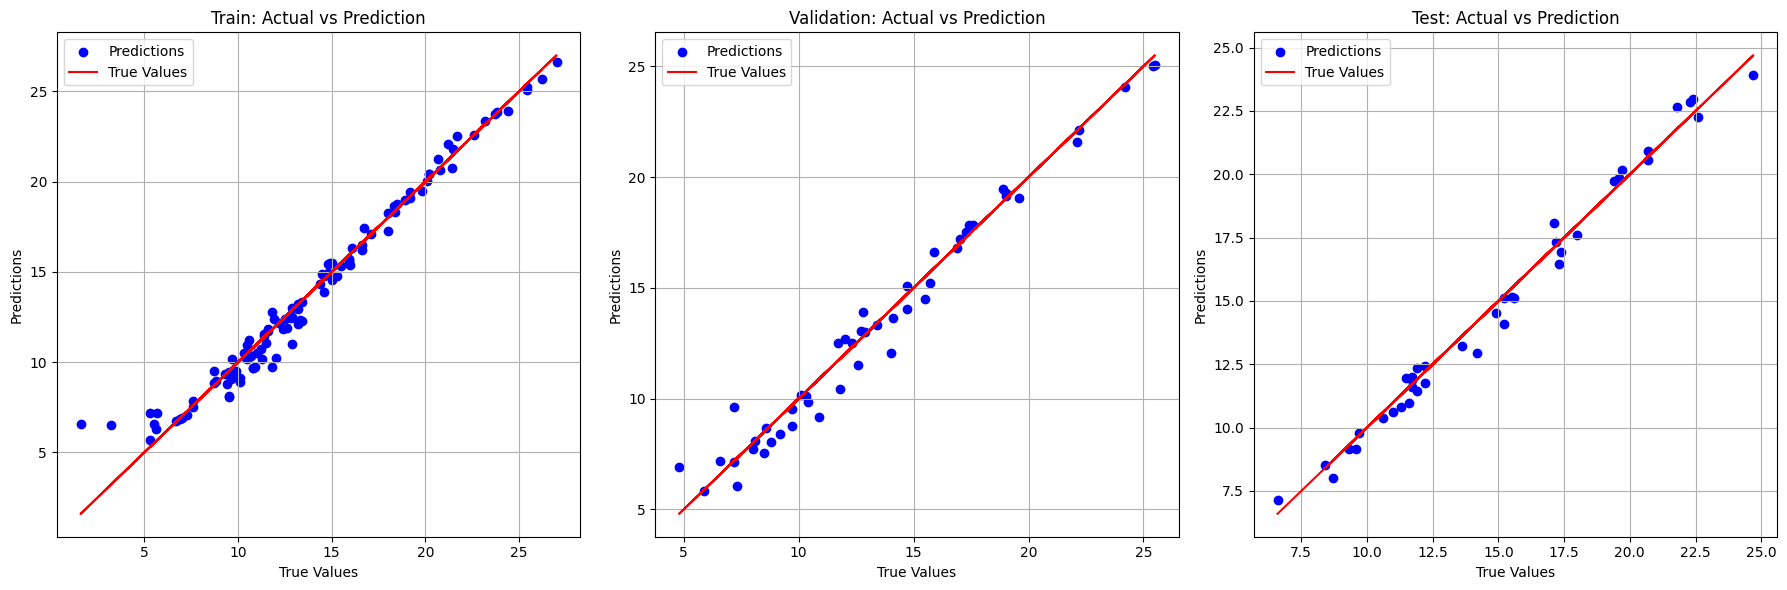

In [887]:

plot_predictions_three_sets(mlp_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)


**VẼ ĐỒ THI HÀM MẤT MÁT(loss funtion) MLPRegressor**

Số lần lặp thực tế trước khi hội tụ: 625
Tình trạng hội tụ: Mô hình đã hội tụ


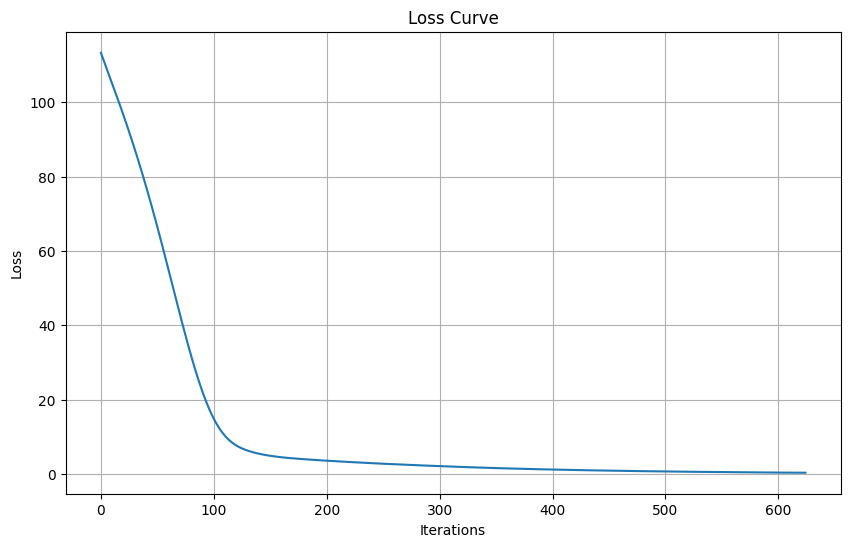

In [888]:

def plot_loss_curve(model):
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)  # Thêm lưới cho đồ thị
    plt.show()

# Kiểm tra số vòng lặp thực tế
print(f"Số lần lặp thực tế trước khi hội tụ: {mlp_reg.n_iter_}")
print(f"Tình trạng hội tụ: {'Mô hình đã hội tụ' if mlp_reg.n_iter_ < mlp_reg.max_iter else 'Mô hình chưa hội tụ'}")
# Vẽ hàm mất mát MLP regession
plot_loss_curve(mlp_reg)

**Nhận xét:**
- Giảm nhanh ban đầu: Trong giai đoạn đầu của quá trình huấn luyện, Loss giảm rất nhanh. Điều này cho thấy mô hình dễ dàng học được những đặc trưng cơ bản từ dữ liệu.
- Giảm chậm dần về sau: Khi số lần lặp tăng lên, tốc độ giảm của Loss chậm lại. Điều này cho thấy mô hình đã bắt đầu học được những đặc trưng phức tạp hơn và cần nhiều lần lặp hơn để cải thiện thêm.
- Ổn định: Đến cuối quá trình, đường cong Loss gần như nằm ngang, cho thấy mô hình đã hội tụ và không còn cải thiện đáng kể nữa.

**DƯỚI ĐÂY LÀ PHẦN TRIỂN KHAI CỦA KĨ THUẬT STACKING**

In [889]:
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# load các model đã được train
linear_model = joblib.load('../savefile/linear_regression_model.pkl')
mlp_model = joblib.load('../savefile/mlp_regression_model1.pkl')
ridge_model = joblib.load('../savefile/ridge_regression_model.pkl')

# Bước 3: Tạo dự đoán từ các mô hình cơ sở bằng Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Tạo các dự đoán cho từng lớp mô hình cơ sở
train_pred_linear_cv = cross_val_predict(linear_model, Train_X_std, Train_Y, cv=kf)
train_pred_mlp_cv = cross_val_predict(mlp_model, Train_X_std, Train_Y, cv=kf)
train_pred_ridge_cv = cross_val_predict(ridge_model, Train_X_std, Train_Y, cv=kf)

# Ghép các dự đoán thành ma trận đặc trưng cho mô hình meta
train_meta_X_cv = np.column_stack((train_pred_linear_cv, train_pred_mlp_cv, train_pred_ridge_cv))

# Bước 4: Tìm kiếm alpha tốt nhất cho mô hình meta bằng GridSearchCV
meta_model = Ridge()

# Tạo lưới tham số để tìm kiếm alpha tốt nhất
param_grid = {'alpha': np.logspace(-3, 3, 50)}  # Các giá trị alpha từ 0.001 đến 1000

# Sử dụng GridSearchCV để tìm alpha tốt nhất
grid_search = GridSearchCV(meta_model, param_grid, cv=kf, scoring='r2')
grid_search.fit(train_meta_X_cv, Train_Y)

# Lấy ra alpha tốt nhất
best_alpha = grid_search.best_params_['alpha']
print(f'Giá trị alpha tốt nhất: {best_alpha}')

# Bước 5: Huấn luyện lại mô hình meta với alpha tốt nhất
meta_model_opt = Ridge(alpha=best_alpha)
meta_model_opt.fit(train_meta_X_cv, Train_Y)

# Bước 6: Đánh giá mô hình trên tập huấn luyện, xác thực và kiểm tra
# Dự đoán trên tập huấn luyện bằng các mô hình cơ sở đã huấn luyện
train_pred_linear = linear_model.predict(Train_X_std)
train_pred_mlp = mlp_model.predict(Train_X_std)
train_pred_ridge = ridge_model.predict(Train_X_std)

# Tạo ma trận đặc trưng cho tập huấn luyện
train_meta_X = np.column_stack((train_pred_linear, train_pred_mlp, train_pred_ridge))

# Dự đoán và đánh giá trên tập huấn luyện
train_meta_pred = meta_model_opt.predict(train_meta_X)

# Tính toán các chỉ số hiệu suất trên tập huấn luyện
train_mse = mean_squared_error(Train_Y, train_meta_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Train_Y, train_meta_pred)

# Dự đoán trên tập xác thực và kiểm tra bằng các mô hình đã huấn luyện
val_pred_linear = linear_model.predict(Val_X_std)
val_pred_mlp = mlp_model.predict(Val_X_std)
val_pred_ridge = ridge_model.predict(Val_X_std)

test_pred_linear = linear_model.predict(Test_X_std)
test_pred_mlp = mlp_model.predict(Test_X_std)
test_pred_ridge = ridge_model.predict(Test_X_std)

# Tạo ma trận đặc trưng cho tập xác thực và kiểm tra
val_meta_X = np.column_stack((val_pred_linear, val_pred_mlp, val_pred_ridge))
test_meta_X = np.column_stack((test_pred_linear, test_pred_mlp, test_pred_ridge))

# Dự đoán và đánh giá trên tập xác thực và kiểm tra
val_meta_pred = meta_model_opt.predict(val_meta_X)
test_meta_pred = meta_model_opt.predict(test_meta_X)

# Tính toán các chỉ số hiệu suất trên tập xác thực và tập kiểm tra
val_mse = mean_squared_error(Val_Y, val_meta_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(Val_Y, val_meta_pred)

test_mse = mean_squared_error(Test_Y, test_meta_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Test_Y, test_meta_pred)

# Hàm in bảng kết quả
def print_metrics_table(train_r2, val_r2, test_r2, train_mse, val_mse, test_mse, train_rmse, val_rmse, test_rmse):
    # Tạo bảng bằng định dạng chuỗi
    header = f"{'Dataset':<12}{'R² Score':<12}{'MSE':<12}{'RMSE':<12}"
    train_row = f"{'Training':<12}{train_r2:<12.4f}{train_mse:<12.4f}{train_rmse:<12.4f}"
    val_row = f"{'Validation':<12}{val_r2:<12.4f}{val_mse:<12.4f}{val_rmse:<12.4f}"
    test_row = f"{'Testing':<12}{test_r2:<12.4f}{test_mse:<12.4f}{test_rmse:<12.4f}"

    # In bảng
    print(header)
    print('-' * len(header))  # Dòng kẻ ngang dưới tiêu đề
    print(train_row)
    print(val_row)
    print(test_row)

# In bảng kết quả
print_metrics_table(train_r2, val_r2, test_r2, train_mse, val_mse, test_mse, train_rmse, val_rmse, test_rmse)

# Lưu mô hình meta đã tối ưu
joblib.dump(meta_model_opt, 'meta_model.pkl')




# # Load các mô hình đã huấn luyện
# linear_model = joblib.load(r'..\savefile\linear_regression_model.pkl')
# mlp_model = joblib.load(r'..\savefile\mlp_regression_model1.pkl')
# ridge_model = joblib.load(r'..\savefile\ridge_regression_model.pkl')

# # Định nghĩa mô hình stacking
# stacking_model = StackingRegressor(
#     estimators=[
#         ('linear', linear_model),
#         ('mlp', mlp_model),
#         ('ridge', ridge_model)
#     ],
#     final_estimator=Ridge()  # Bạn có thể thay đổi final_estimator nếu muốn
# )

# # plot_predictions_three_sets(mlp_reg, Train_X_std, Train_Y, Val_X_std, Val_Y, Test_X_std, Test_Y)
# # Huấn luyện mô hình stacking
# stacking_model.fit(Train_X_std, Train_Y)

# # Đánh giá mô hình bằng k-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(stacking_model,  Train_X_std, Train_Y, cv=kf, scoring='neg_mean_squared_error')

# # Tính RMSE từ các giá trị MSE
# rmse_scores = np.sqrt(-scores)
# print("RMSE trung bình (k-fold):", rmse_scores.mean())

# # Lưu mô hình đã huấn luyện
# joblib.dump(stacking_model, r'..\savefile\stacking_regressor_model.pkl')

# # # Dự đoán trên tập kiểm tra và in ra kết quả
# # predictions = stacking_model.predict(Test_X_std)
# # print("Dự đoán trên tập kiểm tra:", predictions)


# # Hàm để đánh giá mô hình trên một tập dữ liệu cụ thể
# def evaluate_model(model, X, y, set_name):
#     predictions = model.predict(X)
#     mse = mean_squared_error(y, predictions)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y, predictions)
    
#     print(f"Đánh giá mô hình trên tập {set_name}:")
#     print(f"MSE: {mse:.4f}")
#     print(f"RMSE: {rmse:.4f}")
#     print(f"R²: {r2:.4f}\n")

# # Đánh giá trên tập huấn luyện
# evaluate_model(stacking_model, Train_X_std, Train_Y, 'huấn luyện')

# # Đánh giá trên tập xác thực
# evaluate_model(stacking_model, Val_X_std, Val_Y, 'xác thực')

# # Đánh giá trên tập kiểm tra
# evaluate_model(stacking_model, Test_X_std, Test_Y, 'kiểm tra')





Giá trị alpha tốt nhất: 323.745754281764
Dataset     R² Score    MSE         RMSE        
------------------------------------------------
Training    0.9398      1.7123      1.3086      
Validation  0.9408      1.5937      1.2624      
Testing     0.9611      0.8265      0.9091      


['meta_model.pkl']

**VẼ ĐỒ THỊ SỰ CHÊNH LỆCH GIÁ TRỊ THỰC VÀ GIÁ TRỊ DỰ ĐOÁN KĨ THUẬT STACKING**

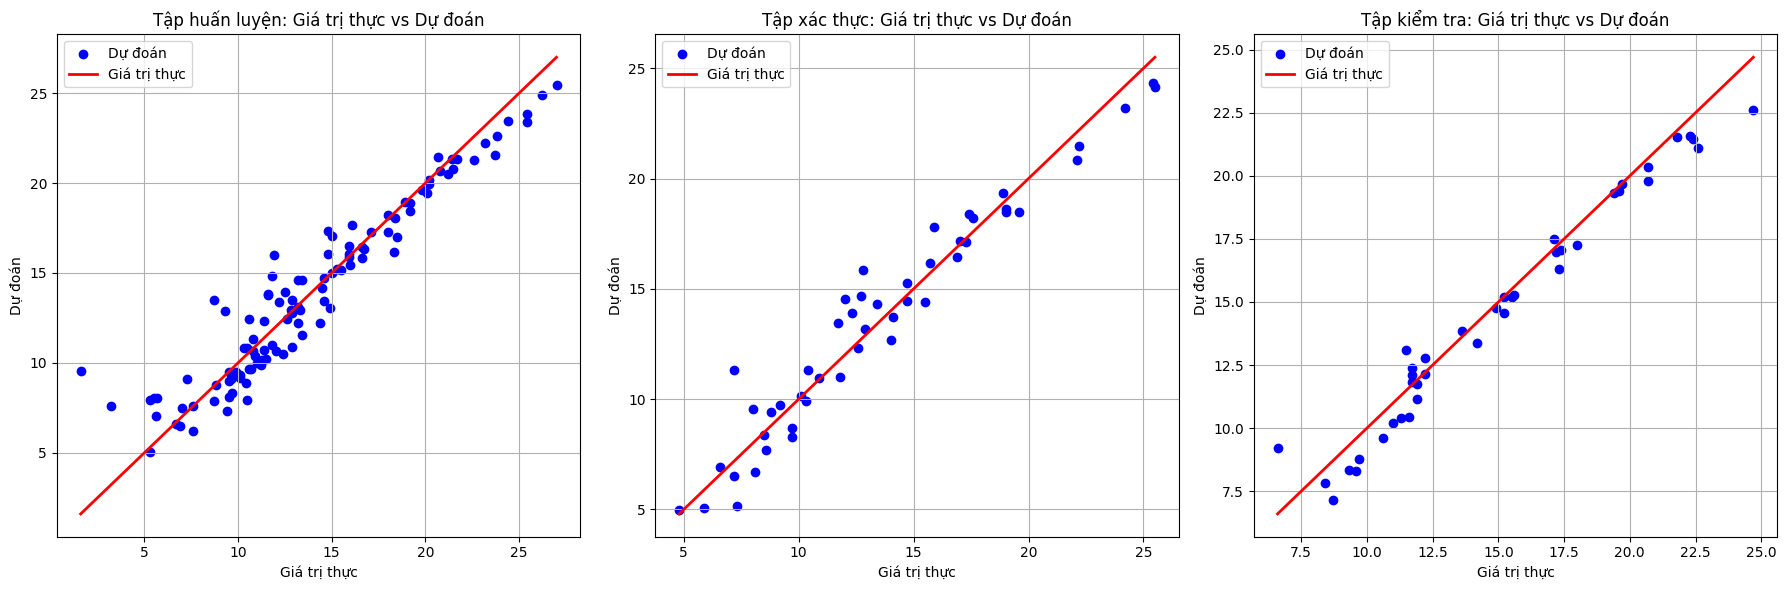

In [890]:


# Bước 1: Dự đoán cho các tập dữ liệu
train_meta_pred = meta_model_opt.predict(train_meta_X_cv)
val_meta_pred = meta_model_opt.predict(val_meta_X)
test_meta_pred = meta_model_opt.predict(test_meta_X)

# Bước 2: Tạo một figure với 3 subplot cho train, validation và test
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Đồ thị cho tập huấn luyện
axs[0].scatter(Train_Y, train_meta_pred, color='blue', label='Dự đoán')
axs[0].plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], color='red', lw=2, label='Giá trị thực')
axs[0].set_title('Tập huấn luyện: Giá trị thực vs Dự đoán')
axs[0].set_xlabel('Giá trị thực')
axs[0].set_ylabel('Dự đoán')
axs[0].legend()
axs[0].grid(True)

# Đồ thị cho tập xác thực
axs[1].scatter(Val_Y, val_meta_pred, color='blue', label='Dự đoán')
axs[1].plot([Val_Y.min(), Val_Y.max()], [Val_Y.min(), Val_Y.max()], color='red', lw=2, label='Giá trị thực')
axs[1].set_title('Tập xác thực: Giá trị thực vs Dự đoán')
axs[1].set_xlabel('Giá trị thực')
axs[1].set_ylabel('Dự đoán')
axs[1].legend()
axs[1].grid(True)

# Đồ thị cho tập kiểm tra
axs[2].scatter(Test_Y, test_meta_pred, color='blue', label='Dự đoán')
axs[2].plot([Test_Y.min(), Test_Y.max()], [Test_Y.min(), Test_Y.max()], color='red', lw=2, label='Giá trị thực')
axs[2].set_title('Tập kiểm tra: Giá trị thực vs Dự đoán')
axs[2].set_xlabel('Giá trị thực')
axs[2].set_ylabel('Dự đoán')
axs[2].legend()
axs[2].grid(True)

# Bước 3: Hiển thị đồ thị
plt.tight_layout()
plt.show()




# # Hàm để vẽ biểu đồ chênh lệch giữa giá trị thực và giá trị dự đoán
# def plot_predictions(model, X, y, set_name, ax):
#     predictions = model.predict(X)
    
#     # Vẽ biểu đồ
#     ax.scatter(y, predictions, color='blue', label='Dự đoán', alpha=0.6)
#     ax.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Đường chuẩn')
#     ax.set_title(f'Giá trị thực vs Dự đoán trên tập {set_name}')
#     ax.set_xlabel('Giá trị thực')
#     ax.set_ylabel('Giá trị dự đoán')
#     ax.legend()
#     ax.grid()

# # Tạo các subplots
# fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# # Vẽ biểu đồ cho các tập dữ liệu khác nhau
# plot_predictions(stacking_model, Train_X_std, Train_Y, 'huấn luyện', axs[0])
# plot_predictions(stacking_model, Val_X_std, Val_Y, 'xác thực', axs[1])
# plot_predictions(stacking_model, Test_X_std, Test_Y, 'kiểm tra', axs[2])

# # Hiển thị biểu đồ
# plt.tight_layout()
# plt.show()
